# 1. A Brief History of Big Data

There's been a lot of buzz about big data over the last few years, and it's finally become mainstream. Companies like Google and Yahoo! have grown their user bases significantly, and are collecting more information on how people interact with their products. [Moore's law](https://en.wikipedia.org/wiki/Moore%27s_law) and the rapidly [falling cost of storage](https://www.aei.org/wp-content/uploads/2013/04/storage3_f.jpg) have contributed greatly to the big data phenomena.

While software companies got better at collecting massive amounts of data, their ability to analyze and make sense of it didn't keep pace. Because existing technologies couldn't analyze such large quantities of data, companies like Google, Facebook, Yahoo!, and LinkedIn had to build new paradigms and tools that could do the job.

Engineers initially tried using bigger and more powerful computers to process the data, but still ran into limits for many computational problems. Along the way, they developed paradigms like [MapReduce](https://en.wikipedia.org/wiki/MapReduce) that `efficiently distribute calculations over hundreds or thousands of computers to calculate the result in parallel.` Hadoop is an open source project that quickly became the dominant processing toolkit for big data

**Hadoop**

Hadoop consists of a file system (Hadoop Distributed File System, or HDFS) and its own implementation of the MapReduce paradigm. `MapReduce converts computations into Map and Reduce steps that Hadoop can easily distribute over many machines`

`Hadoop made it possible to analyze large data sets, but relied heavily on disk storage (rather than memory) for computation. While it's inexpensive to store large volumes of data this way, it makes` [accessing and processing it much slower](http://www.cnet.com/news/understanding-ram-versus-hard-drive-space-via-an-analogy/).

Hadoop wasn't a great solution for calculations requiring multiple passes over the same data or many intermediate steps, due to the need to write to and read from the disk between each step. This drawback also made Hadoop difficult to use for interactive data analysis, the main task data scientists need to do.

Hadoop also suffered from suboptimal support for the additional libraries many data scientists needed, such as SQL and machine learning implementations. Once the cost of RAM (computer memory) started to drop significantly, augmenting or replacing Hadoop by storing data in-memory quickly emerged as an appealing alternative.

# 2. The Spark Revolution

The [UC Berkeley AMP Lab](https://amplab.cs.berkeley.edu/projects/spark-lightning-fast-cluster-computing/) spearheaded groundbreaking work to develop Spark, which `uses distributed, in-memory data structures to improve speeds `for many data processing workloads by several orders of magnitude. If you're interested in learning more, you can read about [why Spark is a crossover hit for data scientists](http://blog.cloudera.com/blog/2014/03/why-apache-spark-is-a-crossover-hit-for-data-scientists/), or check out some of the original papers on the [Apache Spark homepage](http://spark.apache.org/research.html).

# 3. Resilient Distributed Data Sets (RDDs)

The `core data structure in Spark is a resilient distributed data set (RDD)`. As the name suggests, an RDD is Spark's representation of a `data set that's distributed across the RAM, or memory, of a cluster of many machines`. An RDD object is essentially a collection of elements we can use to hold lists of tuples, dictionaries, lists, etc. Similar to a pandas DataFrame, we can load a data set into an RDD, and then run any of the methods accesible to that object.

**PySpark**

While the Spark toolkit is in Scala, a language that compiles down to bytecode for the JVM, the open source community has developed a wonderful toolkit called `PySpark that allows us to interface with RDDs in Python`. Thanks to a library called `Py4J, Python can interface with Java objects (in our case RDDs)`. Py4J is also one of the tools that makes PySpark work.

In [9]:
raw_data = sc.textFile("daily_show.tsv")
raw_data.take(5)

NameError: name 'sc' is not defined

We automatically have access to the SparkContext object sc. We then run the following code to read the TSV data set into an RDD object raw_data:

raw_data = sc.textFile("daily_show.tsv")

The RDD object raw_data closely resembles a list of string objects, with one object for each line in the data set. We then use the take() method to print the first five elements of the RDD:

raw_data.take(5)

To start off, we'll load the data set into an RDD. We're using the TSV version of [FiveThirtyEight's data set](https://github.com/fivethirtyeight/data/tree/master/daily-show-guests). `TSV files use a tab character ("\t") as the delimiter, instead of the comma (",") that CSV files use.`

# 4. SparkContext

In Spark, the `SparkContext object manages the connection to the clusters, and coordinates the running of processes on those clusters`. More specifically, `it connects to the cluster managers`. The cluster managers control the executors that run the computations. Here's a diagram from the Spark documentation that will help you visualize the architecture:



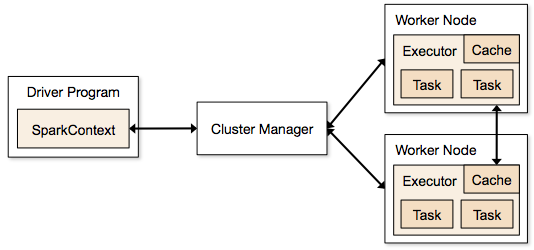

In [1]:
from IPython.display import Image
Image(filename='cluster-overview.png')

# 5. Lazy Evaluation

Spark offers many advantages over regular Python, though. For example, thanks to RDD [abstraction](https://en.wikipedia.org/wiki/Abstraction_%28software_engineering%29), you can run Spark locally on your own computer. `Spark will simulate distributing your calculations over many machines by automatically slicing your computer's memory into partitions`.

Spark's RDD implementation also lets us evaluate code "lazily," meaning `we can postpone running a calculation until absolutely necessary.`

`The advantage of "lazy" evaluation is that we can build up a queue of tasks and let Spark optimize the overall workflow in the background.` In regular Python, the interpreter can't do much workflow optimization.

# 6. Pipelines

While Spark borrowed heavily from Hadoop's MapReduce pattern, it's still quite different in many ways. If you have experience with Hadoop and traditional MapReduce, you may want to read this great [post by Cloudera](http://blog.cloudera.com/blog/2014/09/how-to-translate-from-mapreduce-to-apache-spark/) about the difference between them

`The key idea to understand when working with Spark is data pipelining. Every operation or calculation in Spark is essentially a series of steps that we can chain together and run in succession to form a pipeline. Each step in the pipeline returns either a Python value (such as an integer), a Python data structure (such as a dictionary), or an RDD object. We'll start with the map() function.`

In [10]:
daily_show = raw_data.map(lambda line: line.split('\t'))
daily_show.take(5)

NameError: name 'raw_data' is not defined

# 7. Python and Scala, Friends Forever

One of the wonderful features of PySpark is the `ability to separate our logic - which we prefer to write in Python - from the actual data transformation`

One of the wonderful features of PySpark is the ability to separate our logic - which we prefer to write in Python - from the actual data transformation. In the previous code cell, we wrote this lambda function in Python code:

`raw_data.map(lambda line: line.split('\t'))`

Even though the function was in Python, we also took advantage of Scala when Spark actually ran the code over our RDD. This is the power of PySpark. Without learning any Scala, we get to harness the data processing performance gains from Spark's Scala architecture. Even better, when we ran the following code, it returned the results to us in Python-friendly notation:

`daily_show.take(5)`

Even though the function was in Python, we also took advantage of Scala when Spark actually ran the code over our RDD. This is the power of PySpark. Without learning any Scala, we get to harness the data processing performance gains from Spark's Scala architecture

**Transformations and Actions**

There are two types of methods in Spark:

1. Transformations - map(), reduceByKey()
2. Actions - take(), reduce(), saveAsTextFile(), collect()

Transformations are lazy operations that always return a reference to an RDD object. Spark doesn't actually run the transformations, though, until an action needs to use the RDD resulting from a transformation. Any function that returns an RDD is a transformation, and any function that returns a value is an action. These concepts will become more clear as we work through this lesson and practice writing PySpark code.

**Immutability**

RDD objects are immutable, meaning that we can't change their values once we've created them. In Python, list and dictionary objects are mutable (we can change their values), while tuple objects are immutable. The only way to modify a tuple object in Python is to create a new tuple object with the necessary updates. `Spark uses the immutability of RDDs to enhance calculation speeds`. The mechanics of how it does this are outside the scope of this lesson.

# 8. ReduceByKey()

In [11]:
tally = daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y)
print(tally)

NameError: name 'daily_show' is not defined

# 9. Explanation

You may have noticed that printing tally didn't return the histogram we were hoping for. Because of lazy evaluation, PySpark delayed executing the map and reduceByKey steps until we actually need them. Before we use take() to preview the first few elements in tally, we'll walk through the code we just wrote.

`daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x, y: x+y)`

reduceByKey(f) combines tuples with the same key using the function we specify, f.

To see the results of these two steps, we'll use the take command, which forces lazy code to run immediately. Because tally is an RDD, we can't use Python's len function to find out how many elements are in the collection. Instead, we'll need to use the RDD count() function.

In [6]:
tally.take(tally.count())

NameError: name 'tally' is not defined

# 10. Filter

Unlike pandas, Spark knows nothing about column headers, and didn't set them aside. We need a way to remove the element ('YEAR', 1) from our collection. We'll need a workaround, though, because RDD objects are immutable once we create them. The only way to remove that tuple is to create a new RDD object that doesn't have it.

Spark comes with a filter(f) function that creates a new RDD by filtering an existing one for specific criteria. If we specify a function f that returns a binary value, True or False, the resulting RDD will consist of elements where the function evaluated to True. You can read more about the filter function in the [Spark documentation]().

In [7]:
def filter_year(line):
    if line[0] == 'YEAR':
        return False
    else:
        return True

filtered_daily_show = daily_show.filter(lambda line: filter_year(line))

NameError: name 'daily_show' is not defined

# 11. Practice with Pipelines

To flex Spark's muscles, we'll demonstrate how to chain together a series of data transformations into a pipeline, and observe Spark managing everything in the background. The developers who wrote Spark had this functionality in mind, and optimized it for running tasks in succession.

Before Spark came along, running lots of tasks in succession in Hadoop was incredibly time consuming. Hadoop had to write intermediate results to disk, and wasn't aware of the full pipeline. Thanks to its aggressive approach to memory use and well-architected core, Spark improves on Hadoop's turnaround time significantly. If you're curious, you can read more about this topic in a [Quora thread](http://qr.ae/RHWrT2).

In the following code cell, we'll filter out actors for whom the profession is blank, lowercase each profession, generate a histogram of professions, and output the first five tuples in the histogram.

In [8]:
filtered_daily_show.filter(lambda line: line[1] != '') \
                   .map(lambda line: (line[1].lower(), 1)) \
                   .reduceByKey(lambda x,y: x+y) \
                   .take(5)

NameError: name 'filtered_daily_show' is not defined